## Yolo 적용을 위한 파이썬과 딥러닝 이해
# 신경망 개념 (Neural Network)

### 예제1
- 입력값 x = [1,2,3]
- 출력값 y = [3,5,7]
- 입력값이 주어졌을 때 어떻게 출력값을 예측할까?
> - y = w*x + b 이라고 가정하고, w 와 b 값을 찾는다.
> - 여기서 w 를 **가중치**, b 를 **절편** 이라고 한다.
> - 이 문제에서 w=2, b=1 임을 알 수 있다.

### 예제2
- 입력값 x = [1,2,3]
- 출력값 y = [3,5,9]
- 이 경우는 어떻게 예측할까?
> - 위와 마찬가지로 y = w*x + b 이라고 가정한다.
> - 하지만 딱 맞아떨어지는 w 와 b 값을 찾지 못한다.
> - 예측값 = 2*x + 1 이라고 놓아 보자.
> - 그러면, 예측값 = [3,5,7] 이 된다.

### 손실값(에러) 정의
- 예측값과 실제값(y)의 차이를 수치화한다.
- 절대값 에러 : [3,5,7] 과 [3,5,9] 의 차이값 => [0,0,2] 이 된다. => 평균하면 2/3
- 제곱 에러 : 차이값 => [0,0,2] => 제곱해서 평균하면 4/3
- 이렇게 손실값을 정의하고, **에러를 가장 적게 만드는 w 와 b 를 찾는다**.
> - MAE : Mean Absolute Error, 절대값 평균 에러
> - MSE : Mean Squared Error, 제곱값 평균 에러
> - 손실값 : 영어로 Loss 또는 Error

### 파이썬으로 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
x = np.array([1,2,3])
y = np.array([3,5,9])

w = 2
b = 1

예측값 = w*x + b

print(예측값)
print(y)

[3 5 7]
[3 5 9]


In [6]:
mae = np.abs(예측값 - y).mean()
mse = np.square(예측값 - y).mean()

print(mae, mse)

0.6666666666666666 1.3333333333333333


### 해결해야 할 이슈
- 손실값을 MSE 로 계산할 때 1.33 이 된다.
- 이 값을 0 으로 만들고 싶다. 그러면 w 와 b 값을 어떻게 구할 수 있을까?
- 실제 해결 방법은 아주 무식하다. w 와 b 값을 조금씩 바꿔가면서 가장 손실값이 적은 쪽으로 바꿔 나간다.
- 현재 w=2, b=1 이다. w=2.1 로 바꾸어 보자.

In [7]:
w = 2.1
예측값 = w*x + b
mse = np.square(예측값 - y).mean()
print(mse)

0.9799999999999992


- w 를 1.9 로 바꾸어 보자.

In [8]:
w = 1.9
예측값 = w*x + b
mse = np.square(예측값 - y).mean()
print(mse)

1.7800000000000011


- 결과는 w 를 2.1 로 바꾸니 손실값이 줄어들었다.
- 이런 과정을 계속 반복해서 더이상 손실값이 줄어들지 않을 때 까지 수행한다.
- 무식한 방법이지만, 이런 반복 작업은 컴퓨터가 아주 잘하는 분야이다.
> 이런 해결방법(알고리즘)을 확률적 경사하강법(Stochastic Gradient Descent) 라고 한다.

### 케라스로 답 찾기

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [12]:
model.compile(loss='mse', optimizer='sgd', metrics=['acc'])
model.fit(x.reshape(-1,1), y, epochs=20) # 입력값은 [[1], [2], [3]] 형태로 변환해야 함

Epoch 1/20
3/3 [==============================] - 0s 133ms/step - loss: 14.4751 - acc: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 11.5163 - acc: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 9.1774 - acc: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 7.3285 - acc: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 5.8669 - acc: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 4.7115 - acc: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 0s 1ms/step - loss: 3.7981 - acc: 0.0000e+00
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 3.0759 - acc: 0.0000e+00
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 2.5049 - acc: 0.0000e+00
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 2.0535 - acc: 0.3333
Epoch 11/20
3/3 [==============================] 

In [13]:
model.predict(x.reshape(-1,1))

array([[2.9872653],
       [5.43917  ],
       [7.8910747]], dtype=float32)

In [14]:
ws = model.get_weights()
ws

[array([[2.4519045]], dtype=float32), array([0.5353609], dtype=float32)]

- 예측값 = [2.99, 5.44, 7.90]
- w = 2.45, b = 0.54

Text(0.5,0,'epoch')

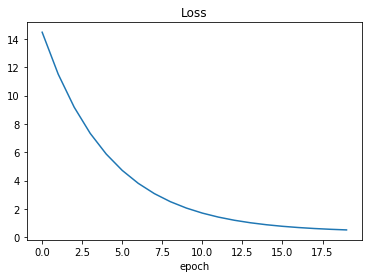

In [21]:
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

### 입력값의 속성이 여러개일 때
<img src='https://miro.medium.com/max/1280/1*n9_4oGTvkmve9ZM07kkQXw.png' />
(출처: https://becominghuman.ai/from-perceptron-to-deep-neural-nets-504b8ff616e)

- 앞에서 x=[1,2,3] 과 같이 한 항목이 숫자 하나였다.
- 키와 몸무게를 가지고 나이를 예측하는 문제를 생각해 보자.
- 그러면 입력값은 (키, 몸무게) 이고, 결과값은 나이 가 된다.
> - X = [[170,68], [162,53], [182,77]]
> - y = [22, 28, 31]
> - 키를 x1, 몸무게를 x2 라고 하자. (각각을 속성이라 한다.)
> - 예측값 = w1 \* x1 + w2 \* x2 + b
- 이와 같이 속성이 두개이므로, 가중치도 w1, w2 두개가 된다.

In [25]:
X = np.array([[170,68],
              [162,53],
              [182,77]])
y = np.array([22, 28, 31])

w = [0.1, 0.2] # [w1, w2] 의 초기값 설정
b = 0.3

예측값 = (X*w).sum(axis=1) + b
print(예측값)

[30.9 27.1 33.9]


In [26]:
mse = np.square(예측값 - y).mean()
print(mse)

29.476666666666677


- 이제 컴퓨터가 잘하는 대로 w1, w2, b 값을 반복적으로 찾으면 된다.

#### 연습문제
- 위의 경우를 keras 로 풀어보자.

### 청소년 혹은 어른? (분류 문제)
- 입력값은 그대로 사용하되, 결과값을 청소년(0), 어른(1) 을 판별하는 문제로 바꾸어 보자.
> - X = [[170,68], [162,53], [182,77]]
> - y = [0, 0, 1]
- 이럴 때에는 결과값이 항상 0 과 1 이므로, 예측값을 0과 1 사이로 맞추는 것이 좋아보인다.
- 위에서 예측값은 [30.9 27.1 33.9] 와 같이 나와, 보기에 좋지 않다.

In [27]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0,0.5,'output value')

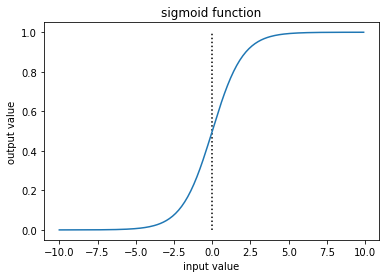

In [32]:
plt.plot(np.arange(-10,10,0.1), sigmoid(np.arange(-10,10,0.1)))
plt.vlines([0], 0, 1, linestyles=':')
plt.title('sigmoid function')
plt.xlabel('input value')
plt.ylabel('output value')

In [33]:
sigmoid(예측값)

array([1., 1., 1.])

- sigmoid 함수를 적용하면 항상 결과가 0~1 사이의 값이 된다.
- 문제해결 방법 => 먼저 위와 같이 중간예측값을 구한 다음 sigmoid 함수를 적용하자.

In [36]:
X = np.array([[170,68],
              [162,53],
              [182,77]])
y = np.array([0,0,1])

w = [0.1, 0.2] # [w1, w2] 의 초기값 설정
b = 0.3

중간예측값 = (X*w).sum(axis=1) + b
print(중간예측값)

예측값 = sigmoid(중간예측값)
print(예측값)

[30.9 27.1 33.9]
[1. 1. 1.]


In [37]:
mse = np.square(예측값 - y).mean()
print(mse)

0.6666666666655076


- w1, w2, b 값을 바꿔 보자.

In [46]:
w = [-1, 2] # [w1, w2] 의 초기값 설정
b = 0.0

중간예측값 = (X*w).sum(axis=1) + b
print(중간예측값)

예측값 = sigmoid(중간예측값)
print(예측값)

[-34. -56. -28.]
[1.71390843e-15 4.78089288e-25 6.91440011e-13]


In [47]:
mse = np.square(예측값 - y).mean()
print(mse)

0.33333333333287235


### 분류 문제 Keras 적용

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD # lr=0.01

X = np.array([[170,68],
              [162,53],
              [182,77]])
# 정규화 적용 (평균 0, 표준편차 1) => 분류 문제에서는 정규화가 필요하다
X = (X-X.mean(axis=0))/X.std(axis=0)

y = np.array([0,0,1])

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,))) # sigmoid 적용, 입력 속성은 2개

In [101]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['acc']) # SGD(lr=0.01)
# 샘플 수가 적어 학습속도를 높여야 한다. (lr=0.1)
history = model.fit(X, y, epochs=500, verbose=True)

Epoch 1/500
3/3 [==============================] - 2s 603ms/step - loss: 0.4844 - acc: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4738 - acc: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4629 - acc: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4517 - acc: 0.0000e+00
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4402 - acc: 0.0000e+00
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 0.4286 - acc: 0.0000e+00
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4168 - acc: 0.0000e+00
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.4049 - acc: 0.0000e+00
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 0.3929 - acc: 0.0000e+00
Epoch 10/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3810 - acc: 0.0000e+00
Epoch 11/500
3/3 [===================

Epoch 89/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0822 - acc: 1.0000
Epoch 90/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0815 - acc: 1.0000
Epoch 91/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0809 - acc: 1.0000
Epoch 92/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0802 - acc: 1.0000
Epoch 93/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0796 - acc: 1.0000
Epoch 94/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0790 - acc: 1.0000
Epoch 95/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0784 - acc: 1.0000
Epoch 96/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0779 - acc: 1.0000
Epoch 97/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0773 - acc: 1.0000
Epoch 98/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0767 - acc: 1.0000
Epoch 99/500
3/3 [==============================] - 0s 1ms/step - loss

Epoch 177/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0489 - acc: 1.0000
Epoch 178/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0487 - acc: 1.0000
Epoch 179/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0485 - acc: 1.0000
Epoch 180/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0483 - acc: 1.0000
Epoch 181/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0480 - acc: 1.0000
Epoch 182/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0478 - acc: 1.0000
Epoch 183/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0476 - acc: 1.0000
Epoch 184/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0474 - acc: 1.0000
Epoch 185/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0472 - acc: 1.0000
Epoch 186/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0469 - acc: 1.0000
Epoch 187/500
3/3 [==============================] - 0s 2ms/

Epoch 265/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0341 - acc: 1.0000
Epoch 266/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0340 - acc: 1.0000
Epoch 267/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0339 - acc: 1.0000
Epoch 268/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0338 - acc: 1.0000
Epoch 269/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0337 - acc: 1.0000
Epoch 270/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0335 - acc: 1.0000
Epoch 271/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0334 - acc: 1.0000
Epoch 272/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0333 - acc: 1.0000
Epoch 273/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0332 - acc: 1.0000
Epoch 274/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0331 - acc: 1.0000
Epoch 275/500
3/3 [==============================] - 0s 3ms/

Epoch 353/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0257 - acc: 1.0000
Epoch 354/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0256 - acc: 1.0000
Epoch 355/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0255 - acc: 1.0000
Epoch 356/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0255 - acc: 1.0000
Epoch 357/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 1.0000
Epoch 358/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0253 - acc: 1.0000
Epoch 359/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0253 - acc: 1.0000
Epoch 360/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0252 - acc: 1.0000
Epoch 361/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0251 - acc: 1.0000
Epoch 362/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0250 - acc: 1.0000
Epoch 363/500
3/3 [==============================] - 0s 2ms/

Epoch 441/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0203 - acc: 1.0000
Epoch 442/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0203 - acc: 1.0000
Epoch 443/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0202 - acc: 1.0000
Epoch 444/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0202 - acc: 1.0000
Epoch 445/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 1.0000
Epoch 446/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0201 - acc: 1.0000
Epoch 447/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 1.0000
Epoch 448/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0200 - acc: 1.0000
Epoch 449/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 1.0000
Epoch 450/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0199 - acc: 1.0000
Epoch 451/500
3/3 [==============================] - 0s 2ms/

In [102]:
model.predict(X)

array([[0.19747484],
       [0.00785683],
       [0.8813    ]], dtype=float32)

Text(0.5,0,'epoch')

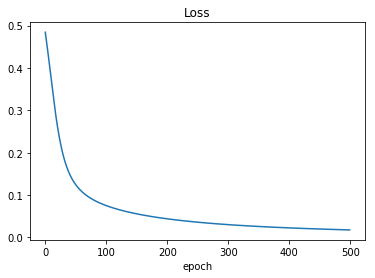

In [103]:
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

### 경계선 그리기

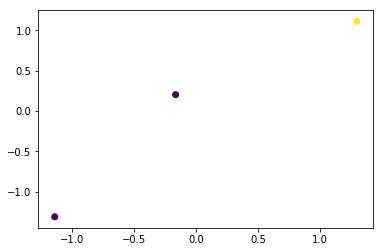

In [104]:
plt.scatter(X[:,0], X[:,1], c=y)

In [105]:
ws = model.get_weights()

In [106]:
ws

[array([[1.535568 ],
        [1.2814701]], dtype=float32), array([-1.411946], dtype=float32)]

In [109]:
w1 = ws[0][0,0]
w2= ws[0][1,0]
b = ws[1][0]

w1, w2, b

(1.535568, 1.2814701, -1.411946)

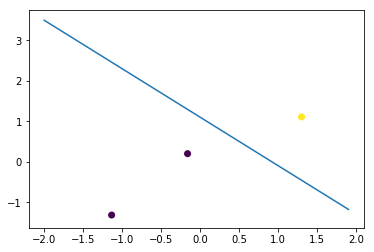

In [110]:
rng = np.arange(-2,2,0.1)
hgt = -(w1/w2) * rng -(b/w2)

plt.plot(rng, hgt)
plt.scatter(X[:,0], X[:,1], c=y)

### Keras 기본 정보

- 케라스 설정파일 : C:/Users/[사용자이름]/.keras/keras.json
- 데이터셋 폴더 : C:/Users/[사용자이름]/.keras\datasets
- 도움말 : http://keras.io
- input_shape=(30,) 또는 input_dim=30
- activation : softmax, relu, tanh, sigmoid (https://keras.io/activations/)

- Sequencial 가이드 : https://keras.io/getting-started/sequential-model-guide/
- optimizer : sgd, rmsprop, adagrad, adam (https://keras.io/optimizers/)
- loss : mse, mae, categorical_crossentropy, binary_crossentropy (https://keras.io/losses/)
- compile, fit 함수 설명 : https://keras.io/models/sequential/

- keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)